Mean of dataset which belong to positive class [10.01145764 19.5495245 ]
Mean of dataset which belong to negative class [20.32489     9.68799575]
Variance of dataset which belong to positive class 26.605896530840155
Variance of dataset which belong to negative class 9.500608154947217


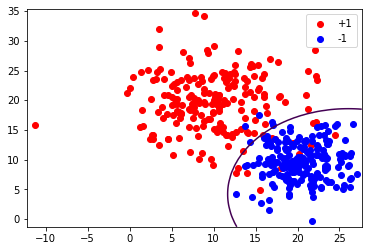

In [78]:
###################~~ Problem-6 Part-1 ~~#####################
###################~~ binclass.txt analysis With Different Variance ~~#####################

import os
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

# Variables to be initialised before running the code
meshgrid_dim = 100                      # Specify the dimensions for the meshgrid matrix (meshgrid_dim * meshgrid_dim matrix)
filepath = "/content/binclass.txt"      # path of the dataset

if(os.path.exists(filepath)):
    data = pd.read_csv(filepath, header=None)
else:
    print(f"ERROR: The dataset file doesn't exist at {filepath}")
    sys.exit()

# Dataset divided into classes
pos = data[data[2] == 1]
neg = data[data[2] == -1]

# Means of the classes
pos_mean = np.array([np.mean(pos[0]), np.mean(pos[1])]) 
neg_mean = np.array([np.mean(neg[0]), np.mean(neg[1])])
print(f"Mean of dataset which belong to positive class {pos_mean}")
print(f"Mean of dataset which belong to negative class {neg_mean}")

# Variance(\sigma^2 given in the question) of the classes
pos_variance = 0.5 * np.mean(np.array(np.linalg.norm(np.array(pos[[0,1]])- pos_mean, ord = 2, axis = 1))**2)
neg_variance = 0.5 * np.mean(np.array(np.linalg.norm(np.array(neg[[0,1]])- neg_mean, ord = 2, axis = 1))**2)
print(f"Variance of dataset which belong to positive class {pos_variance}")
print(f"Variance of dataset which belong to negative class {neg_variance}")

# Creation of the meshgrid
x_min = data[0].min()-1
y_min = data[1].min()-1
x_max = data[0].max()+1
y_max = data[1].max()+1
h_x = (x_max-x_min)/meshgrid_dim
h_y = (y_max-y_min)/meshgrid_dim 
mg_x,mg_y = np.meshgrid(np.arange(x_min, x_max, h_x),np.arange(y_min, y_max, h_y))
(f_x,f_y) = mg_x.shape

def diff_prob(point):
    exp_pos = (np.array(np.linalg.norm(point- pos_mean))**2) / pos_variance
    exp_neg = (np.array(np.linalg.norm(point- neg_mean))**2) / neg_variance
    prob_pos = 0.5 * math.exp(-0.5*exp_pos)/pos_variance
    prob_neg = 0.5 * math.exp(-0.5*exp_neg)/neg_variance 
    return prob_pos-prob_neg

# matrix for storing the result of diff_prob for all the points of mesh_grid
f = np.zeros(mg_x.shape)
for i in range(0,f_x):
    for j in range(0,f_y):
        f[i][j] = diff_prob(np.array([mg_x[i][j], mg_y[i][j]]))

# plot the information
plt.contour(mg_x, mg_y, f,[0])
plt.scatter(pos[0],pos[1],color = 'r', cmap = 'Paired', label = "+1")
plt.scatter(neg[0],neg[1],color = 'b', cmap = 'Paired', label = "-1")
plt.legend()
plt.show()

Mean of dataset which belong to positive class [10.01145764 19.5495245 ]
Mean of dataset which belong to negative class [20.32489     9.68799575]
Mean of dataset [15.16817382 14.61876012]
Variance of dataset 43.50533189720694


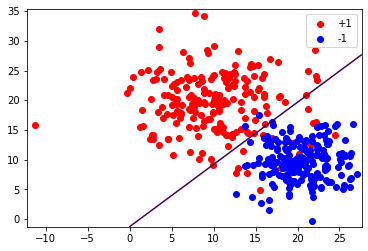

In [79]:
###################~~ Problem-6 Part-1 ~~#####################
###################~~ binclass.txt analysis With Same Variance ~~#####################

import os
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

# Variables to be initialised before running the code
meshgrid_dim = 100                      # Specify the dimensions for the meshgrid matrix (meshgrid_dim * meshgrid_dim matrix)
filepath = "/content/binclass.txt"      # path of the dataset

if(os.path.exists(filepath)):
    data = pd.read_csv(filepath, header=None)
else:
    print(f"ERROR: The dataset file doesn't exist at {filepath}")
    sys.exit()

# Dataset divided into classes
pos = data[data[2] == 1]
neg = data[data[2] == -1]

# Means of the classes and the dataset
pos_mean = np.array([np.mean(pos[0]), np.mean(pos[1])]) 
neg_mean = np.array([np.mean(neg[0]), np.mean(neg[1])])
mean =  np.array([np.mean(data[0]), np.mean(data[1])]) 
print(f"Mean of dataset which belong to positive class {pos_mean}")
print(f"Mean of dataset which belong to negative class {neg_mean}")
print(f"Mean of dataset {mean}")

variance = 0.5* np.mean(np.array(np.linalg.norm(np.array(data[[0,1]])- mean, ord = 2, axis = 1))**2)
print(f"Variance of dataset {variance}")

# Creation of the meshgrid
x_min = data[0].min()-1
y_min = data[1].min()-1
x_max = data[0].max()+1
y_max = data[1].max()+1
h_x = (x_max-x_min)/meshgrid_dim
h_y = (y_max-y_min)/meshgrid_dim 
mg_x,mg_y = np.meshgrid(np.arange(x_min, x_max, h_x),np.arange(y_min, y_max, h_y))
(f_x,f_y) = mg_x.shape

def diff_prob(point):
    exp_pos = (np.array(np.linalg.norm(point- pos_mean))**2) / variance
    exp_neg = (np.array(np.linalg.norm(point- neg_mean))**2) / variance
    prob_pos = 0.5 * math.exp(-0.5*exp_pos)/variance
    prob_neg = 0.5 * math.exp(-0.5*exp_neg)/variance 
    return prob_pos-prob_neg

# matrix for storing the result of diff_prob for all the points of mesh_grid
f = np.zeros(mg_x.shape)
for i in range(0,f_x):
    for j in range(0,f_y):
        f[i][j] = diff_prob(np.array([mg_x[i][j], mg_y[i][j]]))

# plot the information
plt.contour(mg_x, mg_y, f,[0])
plt.scatter(pos[0],pos[1],color = 'r', cmap = 'Paired', label = "+1")
plt.scatter(neg[0],neg[1],color = 'b', cmap = 'Paired', label = "-1")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


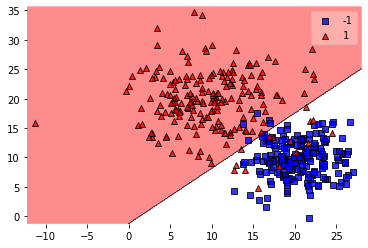

In [80]:
# SVM for part-1
import os
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

filepath = "/content/binclass.txt"

if(os.path.exists(filepath)):
    data = pd.read_csv(filepath, header=None)

X = np.array([[x,y] for x,y in zip(data[0],data[1])])
clf = svm.SVC(kernel='linear')
clf.fit(X, np.array(data[2]))
plot_decision_regions(X, np.array(data[2]), clf=clf, colors='blue,red')
plt.show()

Mean of dataset which belong to positive class [10.57498364 18.5569005 ]
Mean of dataset which belong to negative class [20.32489     9.68799575]
Variance of dataset which belong to positive class 57.38593880628114
Variance of dataset which belong to negative class 9.500608154947217


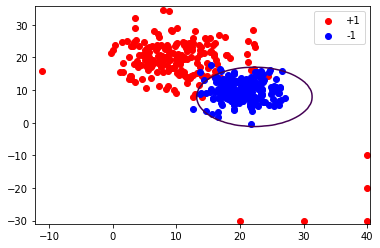

In [81]:
###################~~ Problem-6 Part-2 ~~#####################
###################~~ binclassv2.txt analysis With Different Variance ~~#####################

import os
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

# Variables to be initialised before running the code
meshgrid_dim = 100                      # Specify the dimensions for the meshgrid matrix (meshgrid_dim * meshgrid_dim matrix)
filepath = "/content/binclassv2.txt"      # path of the dataset

if(os.path.exists(filepath)):
    data = pd.read_csv(filepath, header=None)
else:
    print(f"ERROR: The dataset file doesn't exist at {filepath}")
    sys.exit()

# Dataset divided into classes
pos = data[data[2] == 1]
neg = data[data[2] == -1]

# Means of the classes
pos_mean = np.array([np.mean(pos[0]), np.mean(pos[1])]) 
neg_mean = np.array([np.mean(neg[0]), np.mean(neg[1])])
print(f"Mean of dataset which belong to positive class {pos_mean}")
print(f"Mean of dataset which belong to negative class {neg_mean}")

# Variance(\sigma^2 given in the question) of the classes
pos_variance = 0.5* np.mean(np.array(np.linalg.norm(np.array(pos[[0,1]])- pos_mean, ord = 2, axis = 1))**2)
neg_variance = 0.5* np.mean(np.array(np.linalg.norm(np.array(neg[[0,1]])- neg_mean, ord = 2, axis = 1))**2)
print(f"Variance of dataset which belong to positive class {pos_variance}")
print(f"Variance of dataset which belong to negative class {neg_variance}")

# Creation of the meshgrid
x_min = data[0].min()-1
y_min = data[1].min()-1
x_max = data[0].max()+1
y_max = data[1].max()+1
h_x = (x_max-x_min)/meshgrid_dim
h_y = (y_max-y_min)/meshgrid_dim
mg_x,mg_y = np.meshgrid(np.arange(x_min, x_max, h_x),np.arange(y_min, y_max, h_y))
(f_x,f_y) = mg_x.shape

def diff_prob(point):
    exp_pos = (np.array(np.linalg.norm(point- pos_mean))**2) / pos_variance
    exp_neg = (np.array(np.linalg.norm(point- neg_mean))**2) / neg_variance
    prob_pos = 0.5 * math.exp(-0.5*exp_pos)/pos_variance
    prob_neg = 0.5 * math.exp(-0.5*exp_neg)/neg_variance 
    return prob_pos-prob_neg

# matrix for storing the result of diff_prob for all the points of mesh_grid
f = np.zeros(mg_x.shape)
for i in range(0,f_x):
    for j in range(0,f_y):
        f[i][j] = diff_prob(np.array([mg_x[i][j], mg_y[i][j]]))

# plot the information
plt.contour(mg_x, mg_y, f,[0])
plt.scatter(pos[0],pos[1],color = 'r', cmap = 'Paired', label = "+1")
plt.scatter(neg[0],neg[1],color = 'b', cmap = 'Paired', label = "-1")
plt.legend()
plt.show()

Mean of dataset which belong to positive class [10.57498364 18.5569005 ]
Mean of dataset which belong to negative class [20.32489     9.68799575]
Mean of dataset [15.44993682 14.12244812]
Variance of dataset 55.158041679469186


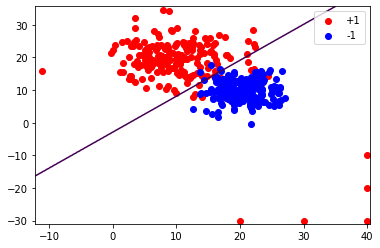

In [83]:
###################~~ Problem-6 Part-2 ~~#####################
###################~~ binclassv2.txt analysis With same Variance ~~#####################

import os
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

# Variables to be initialised before running the code
meshgrid_dim = 100                      # Specify the dimensions for the meshgrid matrix (meshgrid_dim * meshgrid_dim matrix)
filepath = "/content/binclassv2.txt"      # path of the dataset

if(os.path.exists(filepath)):
    data = pd.read_csv(filepath, header=None)
else:
    print(f"ERROR: The dataset file doesn't exist at {filepath}")
    sys.exit()

# Dataset divided into classes
pos = data[data[2] == 1]
neg = data[data[2] == -1]

# Means of the classes and the dataset
pos_mean = np.array([np.mean(pos[0]), np.mean(pos[1])]) 
neg_mean = np.array([np.mean(neg[0]), np.mean(neg[1])])
mean =  np.array([np.mean(data[0]), np.mean(data[1])]) 
print(f"Mean of dataset which belong to positive class {pos_mean}")
print(f"Mean of dataset which belong to negative class {neg_mean}")
print(f"Mean of dataset {mean}")

variance = 0.5* np.mean(np.array(np.linalg.norm(np.array(data[[0,1]])- mean, ord = 2, axis = 1))**2)
print(f"Variance of dataset {variance}")

# Creation of the meshgrid
x_min = data[0].min()-1
y_min = data[1].min()-1
x_max = data[0].max()+1
y_max = data[1].max()+1
h_x = (x_max-x_min)/meshgrid_dim
h_y = (y_max-y_min)/meshgrid_dim 
mg_x,mg_y = np.meshgrid(np.arange(x_min, x_max, h_x),np.arange(y_min, y_max, h_y))
(f_x,f_y) = mg_x.shape

def diff_prob(point):
    exp_pos = (np.array(np.linalg.norm(point- pos_mean))**2) / variance
    exp_neg = (np.array(np.linalg.norm(point- neg_mean))**2) / variance
    prob_pos = 0.5 * math.exp(-0.5*exp_pos)/variance
    prob_neg = 0.5 * math.exp(-0.5*exp_neg)/variance 
    return prob_pos-prob_neg

# matrix for storing the result of diff_prob for all the points of mesh_grid
f = np.zeros(mg_x.shape)
for i in range(0,f_x):
    for j in range(0,f_y):
        f[i][j] = diff_prob(np.array([mg_x[i][j], mg_y[i][j]]))

# plot the information
plt.contour(mg_x, mg_y, f,[0])
plt.scatter(pos[0],pos[1],color = 'r', cmap = 'Paired', label = "+1")
plt.scatter(neg[0],neg[1],color = 'b', cmap = 'Paired', label = "-1")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


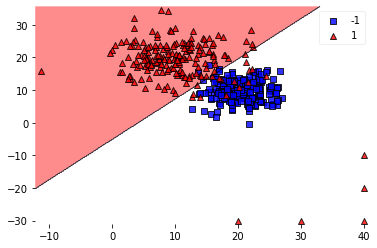

In [ ]:
# SVM for part-2
import os
import sys

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from mlxtend.plotting import plot_decision_regions

filepath = "/content/binclassv2.txt"

if(os.path.exists(filepath)):
    data = pd.read_csv(filepath, header=None)

X = np.array([[x,y] for x,y in zip(data[0],data[1])])
clf = svm.SVC(kernel='linear')
clf.fit(X, np.array(data[2]))
plot_decision_regions(X, np.array(data[2]), clf=clf, colors='blue,red')
plt.show()